In [3]:
!pip install gpxpy

In [7]:
import pandas as pd
import os
import gpxpy
import chardet
import matplotlib.pyplot as plt

Total Distance: 65.71 miles
Elevation Gain: 11043 ft
Elevation Loss: 11043 ft
Max Elevation: 4331 ft
Min Elevation: 1329 ft
Average Grade: 3.18%


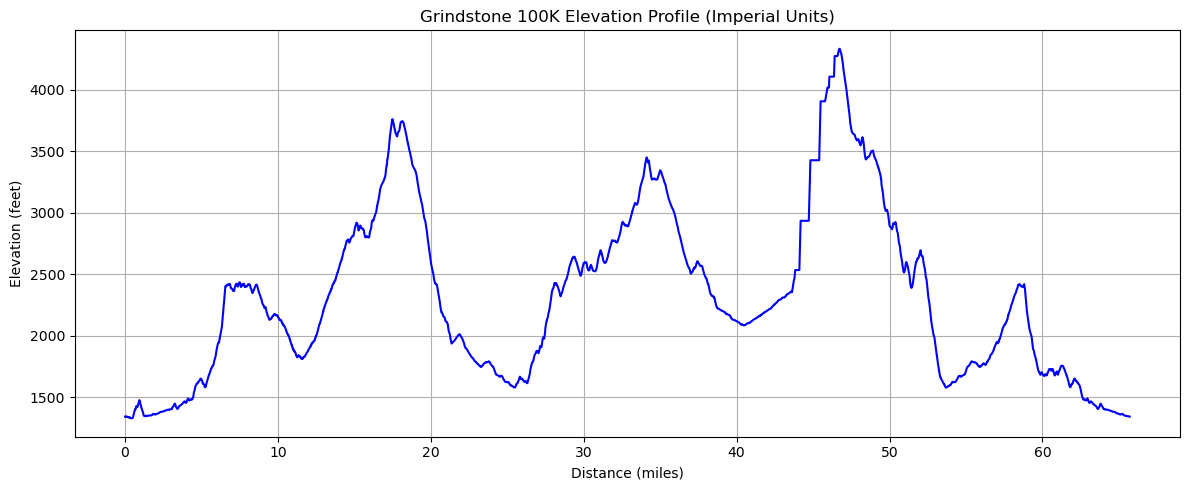

In [11]:
import gpxpy
import matplotlib.pyplot as plt

# === Load GPX File ===
gpx_path = r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\grindstone\2025_grindstone_course.gpx'
with open(gpx_path, 'r') as f:
    gpx = gpxpy.parse(f)

# Initialize Variables
total_distance_m = 0
elevation_gain_m = 0
elevation_loss_m = 0
elevations_m = []
distances_m = []

# Process Track Points
for track in gpx.tracks:
    for segment in track.segments:
        prev_point = None
        for point in segment.points:
            if prev_point:
                dist = point.distance_3d(prev_point)
                total_distance_m += dist
                distances_m.append(total_distance_m)
                delta_elev = point.elevation - prev_point.elevation
                if delta_elev > 0:
                    elevation_gain_m += delta_elev
                else:
                    elevation_loss_m -= delta_elev
            else:
                distances_m.append(0)
            elevations_m.append(point.elevation)
            prev_point = point

# Convert to Imperial Units
meters_to_miles = 0.000621371
meters_to_feet = 3.28084

total_distance_mi = total_distance_m * meters_to_miles
elevation_gain_ft = elevation_gain_m * meters_to_feet
elevation_loss_ft = elevation_loss_m * meters_to_feet
elevations_ft = [e * meters_to_feet for e in elevations_m]
distances_mi = [d * meters_to_miles for d in distances_m]

max_elev_ft = max(elevations_ft)
min_elev_ft = min(elevations_ft)
avg_grade = (elevation_gain_ft / (total_distance_mi * 5280)) * 100 if total_distance_mi > 0 else 0

# Print Stats
print(f"Total Distance: {total_distance_mi:.2f} miles")
print(f"Elevation Gain: {elevation_gain_ft:.0f} ft")
print(f"Elevation Loss: {elevation_loss_ft:.0f} ft")
print(f"Max Elevation: {max_elev_ft:.0f} ft")
print(f"Min Elevation: {min_elev_ft:.0f} ft")
print(f"Average Grade: {avg_grade:.2f}%")

# Plot Elevation Profile
plt.figure(figsize=(12, 5))
plt.plot(distances_mi, elevations_ft, color='blue')
plt.title("Grindstone 100K Elevation Profile (Imperial Units)")
plt.xlabel("Distance (miles)")
plt.ylabel("Elevation (feet)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
with open(r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\grindstone\2025_grindstone_course.gpx', 'r') as f:
    gpx = gpxpy.parse(f)

# Check for waypoints
if gpx.waypoints:
    for wpt in gpx.waypoints:
        print(f"POI: {wpt.name} at ({wpt.latitude}, {wpt.longitude})")
else:
    print("No standalone POIs found.")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\user\\workspace\\c11\\Capstone\\NewForce-Data-Analytics-Capstone\\data\\gpx\\grindstone\\2025_grindstone_course.gpx'

In [9]:
# By default, python reads .gpx files using cp1252 on Windows. Use this code block to detect encoding and parse
# GPX files.

gpx_dir = r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx'

def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        raw_data = f.read(10000)  # Read a chunk for detection
    result = chardet.detect(raw_data)
    return result['encoding']

for filename in os.listdir(gpx_dir):
    if filename.endswith('.gpx'):
        gpx_path = os.path.join(gpx_dir, filename)
        try:
            encoding = detect_encoding(gpx_path)
            with open(gpx_path, 'r', encoding=encoding) as f:
                gpx = gpxpy.parse(f)
            print(f"Parsed: {filename} with encoding {encoding}")
        except Exception as e:
            print(f"Failed to parse {filename}: {e}")


# All gpx files in the gpx folder are encoded in ascii expect for doi_inthanon (utf-8)

Parsed: 2024_black_canyon.gpx with encoding ascii
Parsed: 2025_ccc.gpx with encoding ascii
Parsed: 2025_chianti.gpx with encoding ascii
Parsed: 2025_grindstone.gpx with encoding ascii
Parsed: 2025_tarawera.gpx with encoding ascii
Parsed: 2025_utmb.gpx with encoding ascii
Parsed: bandera.gpx with encoding ascii
Parsed: doi_inthanon.gpx with encoding utf-8
Parsed: javelina_jundred.gpx with encoding ascii
Parsed: nice_cote_d_azur.gpx with encoding ascii
Parsed: the_canyons.gpx with encoding ascii
Parsed: western_states.gpx with encoding ascii


In [40]:
# Unit conversions
meters_to_miles = 0.000621371
meters_to_feet = 3.28084
altitude_threshold_ft = 4000

# Directory containing GPX files
gpx_dir = r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx'

summary_rows = []


for filename in os.listdir(gpx_dir):
    if filename.endswith('.gpx'):
        gpx_path = os.path.join(gpx_dir, filename)
        with open(gpx_path, 'r', encoding = 'utf-8') as f:
            gpx = gpxpy.parse(f)

        # Initialize metrics
        total_distance_m = 0
        elevation_gain_m = 0
        elevation_loss_m = 0
        altitude_exposure_m = 0
        elevations_m = []
        distances_m = []
        steepest_grade_pct = 0

        # Process track points
        for track in gpx.tracks:
            for segment in track.segments:
                prev_point = None
                for point in segment.points:
                    # Skip if elevation data is missing
                    if point.elevation is None or (prev_point and prev_point.elevation is None):
                        prev_point = point
                        continue
        
                    if prev_point:
                        dist = point.distance_3d(prev_point)
                        total_distance_m += dist
                        distances_m.append(total_distance_m)
        
                        delta_elev = point.elevation - prev_point.elevation
                        if delta_elev > 0:
                            elevation_gain_m += delta_elev
                        else:
                            elevation_loss_m -= delta_elev
        
                        if point.elevation * meters_to_feet > altitude_threshold_ft:
                            altitude_exposure_m += dist
                            
                    else:
                        distances_m.append(0)
        
                    elevations_m.append(point.elevation)
                    prev_point = point

                # Loop vs point-to-point
                start_point = segment.points[0]
                end_point = segment.points[-1]
                loop_course = start_point.distance_3d(end_point) < 100  # meters

                # Latitude/Longitude
                latitude = start_point.latitude
                longitude = start_point.longitude


        # Convert units
        total_distance_mi = total_distance_m * meters_to_miles
        elevation_gain_ft = elevation_gain_m * meters_to_feet
        elevation_loss_ft = elevation_loss_m * meters_to_feet
        altitude_exposure_mi = altitude_exposure_m * meters_to_miles
        max_elev_ft = max(elevations_m) * meters_to_feet
        min_elev_ft = min(elevations_m) * meters_to_feet
        elevation_range_ft = max_elev_ft - min_elev_ft
        avg_grade = (elevation_gain_ft / (total_distance_mi * 5280)) * 100 if total_distance_mi > 0 else 0

        print(f"{filename}: distance_mi={total_distance_mi}, gain_ft={elevation_gain_ft}, avg_grade_pct={avg_grade}")

        # Difficulty index
        if total_distance_mi > 0:
            climb_per_mile = elevation_gain_ft / total_distance_mi
            altitude_factor = (altitude_exposure_mi / total_distance_mi) * 5
            grade_factor = (avg_grade / 100) * 5  # New: scaled contribution from average grade
            difficulty_index = climb_per_mile + altitude_factor + grade_factor
        else:
            difficulty_index = 0



        # Extract race name and year
        parts = filename.replace(".gpx", "").split("_")
        year = next((p for p in parts if p.isdigit()), "Unknown")
        race_name = " ".join([p.capitalize() for p in parts if not p.isdigit()])

        # Append Summary
        summary_rows.append({
            "race": race_name,
            "distance_mi": round(total_distance_mi, 2),
            "elevation_gain_ft": round(elevation_gain_ft),
            "elevation_loss_ft": round(elevation_loss_ft),
            "max_elev_ft": round(max_elev_ft),
            "min_elev_ft": round(min_elev_ft),
            "elevation_range_ft": round(elevation_range_ft),
            "avg_grade_pct": round(avg_grade, 2),
            "altitude_exposure_mi": round(altitude_exposure_mi, 2),
            "num_waypoints": len(gpx.waypoints),
            "course_type": "Loop" if loop_course else "Point-to-Point",
            "latitude": round(latitude, 6),
            "longitude": round(longitude, 6),
            "difficulty_index": round(difficulty_index, 2)
        })



2024_black_canyon.gpx: distance_mi=62.92641324785885, gain_ft=5604.5605467999985, avg_grade_pct=1.6868430055743253
2025_ccc.gpx: distance_mi=62.53021697811954, gain_ft=20049.2650338432, avg_grade_pct=6.072598929316748
2025_chianti.gpx: distance_mi=74.91844315087893, gain_ft=19799.9260497572, avg_grade_pct=5.005424347540253
2025_grindstone.gpx: distance_mi=65.71083971944554, gain_ft=11043.30744, avg_grade_pct=3.1829383233114585
2025_tarawera.gpx: distance_mi=63.69181190997359, gain_ft=11148.976972056476, avg_grade_pct=3.315259223484958
2025_utmb.gpx: distance_mi=108.689381262916, gain_ft=34480.13977709299, avg_grade_pct=6.0082497732144216
bandera.gpx: distance_mi=62.6422989655882, gain_ft=6820.86636, avg_grade_pct=2.0622339398968283
doi_inthanon.gpx: distance_mi=106.87983792878207, gain_ft=36187.82009392605, avg_grade_pct=6.412578778641785
javelina_jundred.gpx: distance_mi=98.43466525943282, gain_ft=6626.115697600017, avg_grade_pct=1.2749026489204511
nice_cote_d_azur.gpx: distance_mi=68

In [41]:
df_summary = pd.DataFrame(summary_rows)
print("\n📋 Summary DataFrame:")
df_summary


📋 Summary DataFrame:


,race,distance_mi,elevation_gain_ft,elevation_loss_ft,max_elev_ft,min_elev_ft,elevation_range_ft,avg_grade_pct,altitude_exposure_mi,num_waypoints,course_type,latitude,longitude,difficulty_index
0,Black Canyon,62.93,5605,7726,4190,1741,2450,1.69,4.53,9,Point-to-Point,34.347600,-112.157550,89.51
1,Ccc,62.53,20049,20640,8406,3408,4999,6.07,57.75,0,Point-to-Point,45.792841,6.971575,325.55
2,Chianti,74.92,19800,19798,2957,949,2008,5.01,0.00,0,Loop,43.486612,11.374433,264.54
3,Grindstone,65.71,11043,11043,4331,1329,3002,3.18,1.25,8,Loop,38.358370,-79.083630,168.31
4,Tarawera,63.69,11149,10348,2396,130,2267,3.32,0.00,10,Point-to-Point,-38.096145,176.707157,175.21
5,Utmb,108.69,34480,34477,8325,2658,5667,6.01,85.40,0,Loop,45.923539,6.869039,321.46
6,Bandera,62.64,6821,6896,1998,1401,597,2.06,0.00,0,Loop,29.648547,-99.200051,108.99
7,Doi Inthanon,106.88,36188,36135,6769,973,5796,6.41,39.60,14,Point-to-Point,18.487380,98.666660,340.76
8,Javelina Jundred,98.43,6626,6626,2482,1625,857,1.27,0.00,3,Loop,33.672820,-111.701700,67.38
9,Nice Cote D Azur,68.07,15854,20222,6071,12,6059,4.41,19.89,0,Point-to-Point,44.093119,7.051349,234.59


In [42]:
# Normalize difficulty index with a floor
all_difficulties = [row["difficulty_index"] for row in summary_rows]
min_diff = min(all_difficulties)
max_diff = max(all_difficulties)

for row in summary_rows:
    if max_diff > min_diff:
        normalized = 5 + (row["difficulty_index"] - min_diff) / (max_diff - min_diff) * 95
        row["difficulty_index_normalized"] = round(normalized, 2)
    else:
        row["difficulty_index_normalized"] = 5  # fallback if all values are equal


In [43]:
df = pd.DataFrame(summary_rows)
df

,race,distance_mi,elevation_gain_ft,elevation_loss_ft,max_elev_ft,min_elev_ft,elevation_range_ft,avg_grade_pct,altitude_exposure_mi,num_waypoints,course_type,latitude,longitude,difficulty_index,difficulty_index_normalized
0,Black Canyon,62.93,5605,7726,4190,1741,2450,1.69,4.53,9,Point-to-Point,34.347600,-112.157550,89.51,12.69
1,Ccc,62.53,20049,20640,8406,3408,4999,6.07,57.75,0,Point-to-Point,45.792841,6.971575,325.55,94.71
2,Chianti,74.92,19800,19798,2957,949,2008,5.01,0.00,0,Loop,43.486612,11.374433,264.54,73.51
3,Grindstone,65.71,11043,11043,4331,1329,3002,3.18,1.25,8,Loop,38.358370,-79.083630,168.31,40.07
4,Tarawera,63.69,11149,10348,2396,130,2267,3.32,0.00,10,Point-to-Point,-38.096145,176.707157,175.21,42.47
5,Utmb,108.69,34480,34477,8325,2658,5667,6.01,85.40,0,Loop,45.923539,6.869039,321.46,93.29
6,Bandera,62.64,6821,6896,1998,1401,597,2.06,0.00,0,Loop,29.648547,-99.200051,108.99,19.46
7,Doi Inthanon,106.88,36188,36135,6769,973,5796,6.41,39.60,14,Point-to-Point,18.487380,98.666660,340.76,100.00
8,Javelina Jundred,98.43,6626,6626,2482,1625,857,1.27,0.00,3,Loop,33.672820,-111.701700,67.38,5.00
9,Nice Cote D Azur,68.07,15854,20222,6071,12,6059,4.41,19.89,0,Point-to-Point,44.093119,7.051349,234.59,63.11


In [44]:
df.to_csv("../data/master/gpx_summary_master.csv", index=False)